# Python Neural Network implementation based on Andrew Ng's Coursera Machine Learning Class

In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio

#### Read in MATLAB data

In [2]:
mat_contents = sio.loadmat("../coursera/machine-learning-ex4/ex4/ex4data1.mat")

In [3]:
X = mat_contents["X"]
y = mat_contents["y"]
X.shape, y.shape

((5000, 400), (5000, 1))

## Create NN class

### In the Coursera class we assumed a three-layer NN like in the following model: 

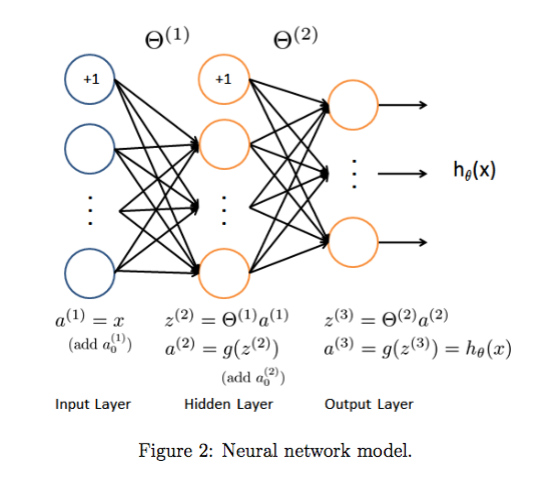

In [217]:
from IPython.display import Image
Image("NNmodel.png")

### Here I don't want to restrict the number of layers but work with a more generalized version

In [ ]:
class NeuralNet(object):
    
    def __init__(self, sizes): 
    '''
    Initialize a NeuralNet object that takes as input the data matrix X, 
    the outcome vector y and an array containing the number of neurons
    in the respecitve layers of the network. [10, 5, 2] would be a three-layer
    network with the input layer consisting of 10 neurons, the hidden layer of 5
    and the output layer of 2 neurons.
    Based on the sizes, according weights will be created which are chosen
    randomly from a Gaussian distribution for symmetry breaking reasons.
    '''
        self.num_layers = len(sizes)
        self.sizes = sizes
        # We need Weight Matrices of the dim (dim 2nd layer, dim 1st layer), 
        # (dim 3rd layer, dim 2nd layer) ... , (n-th layer, dim n-1-th layer) 
        self.weights = [np.random.randn(y,x+1) for x,y in zip(sizes[:-1], sizes[1:])]
        # Bias for each layer except input layer
        self.biases = [np.random.randn(y,1) for y in sizes[1:]]
        
    def train(self, X, y, iterations, lambda_, alpha):
        for n in iterations:
            self.update(X, y, lambda_, alpha)
            print("Iteration {0} complete".format())
            
    def update(self, X, y, lambda_):
        '''
        Update weights by applying gradient descent via backprop.
        '''
        #feedforward
        self.feedforward(X,y, lambda_, alpha)
            
    def feedforward(self, X, y, lambda_, alpha):
    a = X
    activations = []
    hypothesis = []
    for w in self.weights:
            a = np.insert(a, 0, 1, axis=1) # Append bias to activation
            activations.append(a)
            
            z = np.dot(a, w.transpose())
            hypothesis.append(z)
            
            a = sigmoid(z)
    # end of loop
    activations.append(a) # append last activation matrix
    
    return activations, hypothesis

    def compute_error(self, y, weights, zs, activation):
    '''
    Computes Error Matrix Delta. Error terms are only computed 
    for layer 2...n, since first layer consists of the input data
    and thus we don't assume any computable erros there.
    Beginning from the last layer we backpropagate the error
    up to the 2nd layer.
    Error term of hidden layers up to the first hidden layer 
    is computed in a loop, while the first hidden layer's and 
    output's error are computed separately after and before the 
    loop respectively.
    
    Indexing might seem confusing, since we loop from
    back to forth. 
    `zs` is the list containing the z-vectors layer by layer ordered from
    first hidden to output layer (2nd, 3rd, ..., output). Note that 
    there is no z-vector for the first layer = input. 
    `activation` is the list containing the activation vectors, 
    ordered (input, a1, a2, ..., output). 
    '''
    errors = [None for i in zs] # empty list to store error matrices
    last_layer = activation[-1] - y # simply the difference between pred and output
    errors[0] = last_layer
    # backprop up to (including) 2nd hidden layer
    # exclude z-vector from input layer since there we use
    # the activation vector to compute the error
    index = 0
    for z, w in zip(zs[-2::-1], weights[-1::-1]):
        z = np.insert(z, 0, 1, axis=1) # Add bias to z-vector
        error = np.dot(errors[index],w) 
        error *= sigmoid_gradient(z)
        errors[index + 1] = error
        index += 1
    return errors
        
            
    def backprop(self, y, weights, z_list, activations, lambda_):
    '''
    Gradient descent via Backprop. Compute error for each
    layer and backpropagate it.
    Starting with last layer and finishing at 2nd. We don't
    assume any errors regarding the 1st layer since that 
    one is represents the data input.
    '''
    m = len(y)
    deltas = compute_error(y, weights, z_list, activations)
    Gradient = []
    # Accumulate gradient. Exclude Bias terms.
    # Last layer needs special treatment 
    last = deltas.pop(0)
    for d,a in zip(deltas[-1::-1],activations):
        print(d[:,1:].transpose().shape,a.shape)
        gradient = np.dot(d[:,1:].transpose(), a)
        Gradient.append(gradient)
    
    # Last layer now
    gradient = np.dot(last.transpose(), activations[-2])
    Gradient.append(gradient)
    # divide by m
    Gradient = [gradient/m for gradient in Gradient]


    # Regularization
    # unbiased_weights = []
    ## here tomorrow
    result = []
    for w,d in zip(weights, Gradient):
        w_noBias = w
        w_noBias[:,0] = 0
        d += (lambda_ / m) * w_noBias;
        result.append(d)
    return result
        
        # Cost
        
    def compute_cost(self, h, y):
        m = len(y)
        J = 1/m * 
        
        
    def one_hot_encoding(self, y):
        '''
        One hot encoding for given vector y. 
        This will be used to convert the digital representation [0...9] of the 
        ouput vector y into a 10-dimensional unit vector
        '''
        n_values = np.max(y) + 1
        # Need to reshape mapped ouput since it'll be a 3D Matrix [len(y), 1, n_values]
        # We need a 2D Matrix of the dimensions (Size y) x (Number of digits) e.g. 5000x10 
        # if y consists of 5000 values with digits 1...9
        return eyes(n_values)[y].reshape(len(y), n_values)
        
    def cost(X, y, weights):
        '''
        Calculate cost function for given data matrix X, 
        ouput vector y and weights matrix.
        We need to sum over all training examples m, for each
        hypothesis 1...k, where k denotes the number of 
        different ouputs, in our case the digis 0...9 (k=10)
        '''
        m,k = y.shape
        
        
        
    def sigmoid(z):
        '''
        Compute sigmoid function of argument z
        '''
        return 1.0 / (1.0 + exp(z))
    
    def sigmoid_gradient(z):
        '''
        Derivation of sigmoid function with argument z
        '''
        return 
    

## Test codes 

#### Load Coursera data to check if implementation is right

In [4]:
weight_contents = sio.loadmat("../coursera/machine-learning-ex4/ex4/ex4weights.mat")
Theta1 = weight_contents["Theta1"]
Theta2 = weight_contents["Theta2"]

In [5]:
y_dummy = sio.loadmat('../coursera/machine-learning-ex4/ex4/y_dummy.mat')
y_dummy = y_dummy['y']
y_dummy

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ..., 
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=uint8)

### One hot encoding of output vector
    We want the digits representation (1...9) as a 10-dim vectorized representation of the kind 
    [1 0 0 0 0 0 0 0 0 0] = 0
    [0 1 0 0 0 0 0 0 0 0] = 1
    .
    . 
    .
    [0 0 0 0 0 0 0 0 0 0] = 9

In [11]:
def one_hot_endcoding(y):
    n_values = np.max(y) + 1
    return np.eye(n_values)[y].reshape(len(y), n_values)

y_temp = one_hot_endcoding(y)
y_temp

array([[ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

### Adding bias term

In [6]:
# Example size input
sizes = [400 ,25, 10]

# Compute weights
weights = [np.random.randn(y,x+1) for x,y in zip(sizes[:-1], sizes[1:])]

# Append Bias to input matrix X
a1 = np.insert(X, 0, 1, axis=1)

# Counter
count = 1

# Add bias term to weight matrices
for w in weights:
    print("Dimension Weight #{0}: {1}".format(count, w.shape))
    w = np.insert(w, 0,1, axis=1)
    print("After adding bias:" , w.shape)
    count += 1

[w.shape for w in weights]

Dimension Weight #1: (25, 401)
After adding bias: (25, 402)
Dimension Weight #2: (10, 26)
After adding bias: (10, 27)


[(25, 401), (10, 26)]

### Feedforward

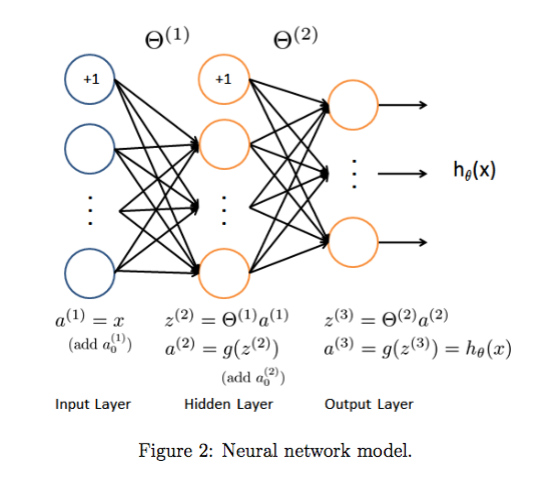

In [93]:
from IPython.display import Image
Image("NNmodel.png")

My model has `n` hidden layers so we must loop through each layer and compute the according activations

In [7]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

In [36]:
def feedforward(X, y, weights, lambda_):
    a = X
    activations = []
    hypothesis = []
    for w in weights:
            a = np.insert(a, 0, 1, axis=1) # Append bias to activation
            activations.append(a)
            
            z = np.dot(a, w.transpose())
            hypothesis.append(z)
            
            a = sigmoid(z)
    # end of loop
    activations.append(a) # append last activation matrix
    
    return activations, hypothesis

a, zs = feedforward(X, y_temp, [Theta1, Theta2], lambda_=0)
_ = [print(a.shape) for a in a]
print()
_ = [print(z.shape) for z in zs]

# output of the neural net (=last layer output)

a2, zs2 = feedforward(X, y_dummy, [Theta1, Theta2], lambda_=0)

(5000, 401)
(5000, 26)
(5000, 10)

(5000, 25)
(5000, 10)
[[  1.12661530e-04   1.74127856e-03   2.52696959e-03 ...,   4.01468105e-04
    6.48072305e-03   9.95734012e-01]
 [  4.79026796e-04   2.41495958e-03   3.44755685e-03 ...,   2.39107046e-03
    1.97025086e-03   9.95696931e-01]
 [  8.85702310e-05   3.24266731e-03   2.55419797e-02 ...,   6.22892325e-02
    5.49803551e-03   9.28008397e-01]
 ..., 
 [  5.17641791e-02   3.81715020e-03   2.96297510e-02 ...,   2.15667361e-03
    6.49826950e-01   2.42384687e-05]
 [  8.30631310e-04   6.22003774e-04   3.14518512e-04 ...,   1.19366192e-02
    9.71410499e-01   2.06173648e-04]
 [  4.81465717e-05   4.58821829e-04   2.15146201e-05 ...,   5.73434571e-03
    6.96288990e-01   8.18576980e-02]]


### Regularized cost function

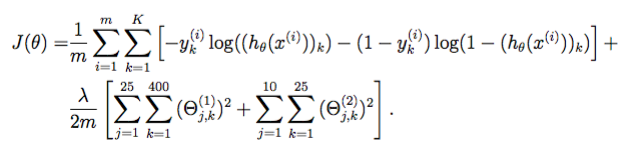

In [238]:
Image("Cost.png")

In [14]:
def cost(y, hypothesis, weights, lambda_):
    m, K = y.shape
    # use Hadamard product instead of looping over K
    J = 1/m * np.sum(np.multiply(-1 * y,np.log(hypothesis))- np.multiply((1-y), np.log(1-hypothesis)))

    # Add regularization Term
    reg = sum([np.sum(np.sum(np.square(w), axis=1)) for w in weights])
    J += lambda_/(2*m) * reg
    return J


cost(y_dummy, a2[-1], [Theta1,Theta2] , 1)

0.38448779624289398

In [15]:
def sigmoid_gradient(z):
    return sigmoid(z)*(1 - sigmoid(z))

In [35]:
def compute_error(y, weights, zs, activation):
    '''
    Computes Error Matrix Delta. Error terms are only computed 
    for layer 2...n, since first layer consists of the input data
    and thus we don't assume any computable erros there.
    Beginning from the last layer we backpropagate the error
    up to the 2nd layer.
    Error term of hidden layers up to the first hidden layer 
    is computed in a loop, while the first hidden layer's and 
    output's error are computed separately after and before the 
    loop respectively.
    
    Indexing might seem confusing, since we loop from
    back to forth. 
    `zs` is the list containing the z-vectors layer by layer ordered from
    first hidden to output layer (2nd, 3rd, ..., output). Note that 
    there is no z-vector for the first layer = input. 
    `activation` is the list containing the activation vectors, 
    ordered (input, a1, a2, ..., output). 
    '''
    errors = [None for i in zs] # empty list to store error matrices
    last_layer = activation[-1] - y # simply the difference between pred and output
    errors[0] = last_layer
    # backprop up to (including) 2nd hidden layer
    # exclude z-vector from input layer since there we use
    # the activation vector to compute the error
    index = 0
    for z, w in zip(zs[-2::-1], weights[-1::-1]):
        z = np.insert(z, 0, 1, axis=1) # Add bias to z-vector
        error = np.dot(errors[index],w) 
        error *= sigmoid_gradient(z)
        errors[index + 1] = error
        index += 1
    return errors
    
computed_errors = compute_error(y_dummy, [Theta1, Theta2], zs2, a2)
_ = [print(i.shape) for i in result]

(5000, 10)
(5000, 26)


In [682]:
a2[0].shape:

(5000, 401)

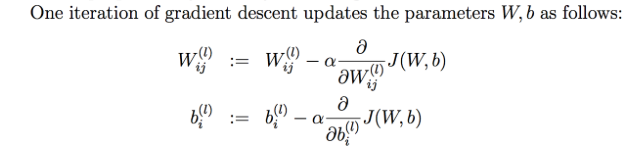

In [94]:
Image('Update WEights.png')

In [89]:
def backprop(y, weights, z_list, activations, lambda_):
    '''
    Gradient descent via Backprop. Compute error for each
    layer and backpropagate it.
    Starting with last layer and finishing at 2nd. We don't
    assume any errors regarding the 1st layer since that 
    one is represents the data input.
    '''
    m = len(y)
    deltas = compute_error(y, weights, z_list, activations)
    Gradient = []
    # Accumulate gradient. Exclude Bias terms.
    # Last layer needs special treatment 
    last = deltas.pop(0)
    for d,a in zip(deltas[-1::-1],activations):
        print(d[:,1:].transpose().shape,a.shape)
        gradient = np.dot(d[:,1:].transpose(), a)
        Gradient.append(gradient)
    
    # Last layer now
    gradient = np.dot(last.transpose(), activations[-2])
    Gradient.append(gradient)
    # divide by m
    Gradient = [gradient/m for gradient in Gradient]


    # Regularization
    # unbiased_weights = []
    ## here tomorrow
    result = []
    for w,d in zip(weights, Gradient):
        w_noBias = w
        w_noBias[:,0] = 0
        d += (lambda_ / m) * w_noBias;
        result.append(d)
    return result
        

Delta = backprop(y_dummy, [Theta1, Theta2], zs, a2, 1)
for i in Delta:
    print(i.shape)

(25, 5000) (5000, 401)
(25, 401)
(10, 26)


In [ ]:
def predict(weights, X):
    '''
    Predicts Label of input X for given weights
    '''
    x = 0
    for w in weights:
        x = np.insert(X, 0, 1, axis=1)
        z = np.dot(x, w.transpose)
        h = sigmoid(z)
        x = h
    
    # Index of max Value == digit
    return np.argmax(x)

In [ ]:
def evaluate(self, test_data):
        """Return the number of test inputs for which the neural
        network outputs the correct result. Note that the neural
        network's output is assumed to be the index of whichever
        neuron in the final layer has the highest activation."""
        test_results = [(np.argmax(self.feedforward(x)), y)
                        for (x, y) in test_data]
        return sum(int(x == y) for (x, y) in test_results)